In [1]:
import numpy as np
import pandas as pd
import joblib
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, plot_confusion_matrix
from sklearn.preprocessing import LabelEncoder  

In [2]:
# load the train and test datasets
train = np.load('train.npy', allow_pickle=True) 
test = np.load('test.npy',allow_pickle=True)

# load the trained model
clf = joblib.load('rf.joblib')

In [3]:
# process the training and test datasets
train_x = np.array(list(train[:,0]))
train_y = train[:,1]

test_x = np.array(list(test[:,0]))
test_y = test[:,1]

# encode the targets
label = LabelEncoder()
en_train_y = label.fit_transform(train_y)
en_test_y = label.fit_transform(test_y)

# train map
mapping = dict(zip(label.classes_, range(len(label.classes_))))

 # Anayze the model performance


In [4]:
# predict the performance on the train data set
train_pred = clf.predict(np.array(list(train_x)))
print('Accuray on the train data:',accuracy_score(en_train_y,train_pred))

# predict the performance on the test dataset
test_pred = clf.predict(np.array(list(test_x)))
print('Accuray on the test data:',accuracy_score(en_test_y,test_pred))

Accuray on the train data: 1.0
Accuray on the test data: 0.9411764705882353


In [5]:
# mapping

In [6]:
# clf = RandomForestClassifier()
# clf.fit(np.array(list(train_x)),np.array(en_train_y))
# pred = clf.predict(np.array(list(test_x)))

In [7]:
# print("Accuracy:", accuracy_score(en_test_y, pred))

In [8]:
# Classicification report for train dataset
print(classification_report(en_train_y,train_pred,target_names=mapping))

                     precision    recall  f1-score   support

  atis_abbreviation       1.00      1.00      1.00       147
      atis_aircraft       1.00      1.00      1.00        81
       atis_airfare       1.00      1.00      1.00       170
       atis_airline       1.00      1.00      1.00       157
        atis_flight       1.00      1.00      1.00       170
   atis_flight_time       1.00      1.00      1.00        54
atis_ground_service       1.00      1.00      1.00       170
      atis_quantity       1.00      1.00      1.00        51

           accuracy                           1.00      1000
          macro avg       1.00      1.00      1.00      1000
       weighted avg       1.00      1.00      1.00      1000



In [9]:
# Classicification report for test dataset
print(classification_report(en_test_y,test_pred,target_names=mapping))

                     precision    recall  f1-score   support

  atis_abbreviation       1.00      1.00      1.00        33
      atis_aircraft       0.75      1.00      0.86         9
       atis_airfare       0.64      1.00      0.78        48
       atis_airline       0.75      1.00      0.85        38
        atis_flight       1.00      0.93      0.96       631
   atis_flight_time       1.00      1.00      1.00         1
atis_ground_service       1.00      1.00      1.00        36
      atis_quantity       0.43      1.00      0.60         3

           accuracy                           0.94       799
          macro avg       0.82      0.99      0.88       799
       weighted avg       0.96      0.94      0.95       799



## Plot the confusion matrix

In [10]:
target_labels = []
for i in mapping.keys():
    target_labels.append(i)

C:\Users\Syahrir Ridha\PycharmProjects\resume_match\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


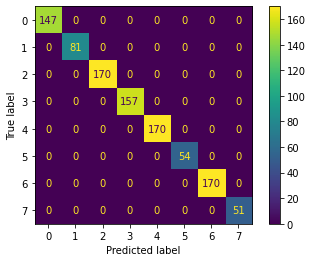

In [11]:
# confusion matrix for the train data
plot_confusion_matrix(clf,train_x,en_train_y)

C:\Users\Syahrir Ridha\PycharmProjects\resume_match\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


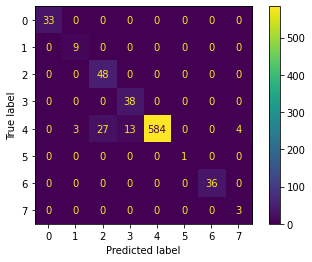

In [12]:
# confusion matrix for test data
plot_confusion_matrix(clf,test_x,en_test_y)

## The lower bound for the probability is assumed to be 0.5

In [13]:
#metrics to keep score of the correct, wrong and shown to human

def metrics(clf,train_x,train_y,prob=0.5):
    
    predict = clf.predict_proba(train_x)
    
    dic = {0:{'corr':0,'human':0,'wrng':0,'total_data':0},
          1:{'corr':0,'human':0,'wrng':0,'total_data':0},
          2:{'corr':0,'human':0,'wrng':0,'total_data':0},
          3:{'corr':0,'human':0,'wrng':0,'total_data':0},
          4:{'corr':0,'human':0,'wrng':0,'total_data':0},
          5:{'corr':0,'human':0,'wrng':0,'total_data':0},
          6:{'corr':0,'human':0,'wrng':0,'total_data':0},
          7:{'corr':0,'human':0,'wrng':0,'total_data':0}}
    
    for i,j in zip(predict,train_y):
        prediction = np.where(i>prob)[0]
        if prediction:
            if prediction == j:
                dic[j]['corr'] += 1
            else:
                dic[j]['wrng'] += 1
        else:
            dic[j]['human'] +=1
    
    # add the total data set
    for key, val in Counter(train_y).items():
        dic[key]['total_data'] += val
    
    df = pd.DataFrame(dic).T
    #df.columns = target_labels
    df.index = target_labels
    df['corr%'] = np.round((df['corr']/df.total_data)*100,2)
    df['human%'] = np.round((df['human']/df.total_data)*100,2)
    df['wrong%'] = np.round((df['wrng']/df.total_data)*100,2)
    return df

In [14]:
# metrics for train data
metrics(clf,train_x,en_train_y)

,corr,human,wrng,total_data,corr%,human%,wrong%
atis_abbreviation,0,147,0,147,0.0,100.0,0.0
atis_aircraft,81,0,0,81,100.0,0.0,0.0
atis_airfare,170,0,0,170,100.0,0.0,0.0
atis_airline,157,0,0,157,100.0,0.0,0.0
atis_flight,170,0,0,170,100.0,0.0,0.0
atis_flight_time,54,0,0,54,100.0,0.0,0.0
atis_ground_service,170,0,0,170,100.0,0.0,0.0
atis_quantity,51,0,0,51,100.0,0.0,0.0


In [15]:
# metrics for test data
metrics(clf,test_x,en_test_y)

C:\Users\Syahrir Ridha\PycharmProjects\resume_match\venv\lib\site-packages\ipykernel_launcher.py:18: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.


,corr,human,wrng,total_data,corr%,human%,wrong%
atis_abbreviation,0,33,0,33,0.00,100.00,0.00
atis_aircraft,8,1,0,9,88.89,11.11,0.00
atis_airfare,45,3,0,48,93.75,6.25,0.00
atis_airline,38,0,0,38,100.00,0.00,0.00
atis_flight,541,54,36,631,85.74,8.56,5.71
atis_flight_time,1,0,0,1,100.00,0.00,0.00
atis_ground_service,36,0,0,36,100.00,0.00,0.00
atis_quantity,3,0,0,3,100.00,0.00,0.00
